In [2]:
import sys
sys.path.append("../..")
from tools.tools import rect_to_cyl
import pylab as plt
import numpy as np
from galpy.potential import MWPotential2014
from galpy.df import quasiisothermaldf
from galpy.actionAngle import actionAngleAdiabatic
aA= actionAngleAdiabatic(pot=MWPotential2014,c=True)
# set up qdf
# qdf not imported from galpy since I am running a modified galpy in console
qdf= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aA,cutcounter=True)

The following plot is qdf sampled using pixel of 0.001

In [3]:
qdf_sample = np.load('data/qdf sample cartesian physical.npy')
R, vR, vT, z, vz, phi = rect_to_cyl(*qdf_sample.T).T

Populating the interactive namespace from numpy and matplotlib
c:\users\user\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



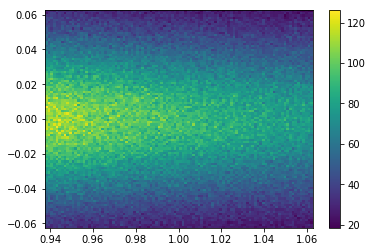

In [4]:
%pylab inline
hist_sample = plt.hist2d(R/8.,z/8., bins = 100, normed = True)
plt.colorbar()

The following plot is sampled using pixel of 0.01, a hundred times less computationally expensive.

Populating the interactive namespace from numpy and matplotlib


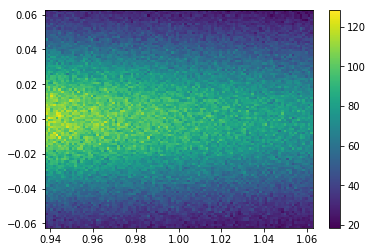

In [ ]:
qdf_sample = np.load('data/qdf sample cartesian physical, date=(2018, 8, 10).npy')
R, vR, vT, z, vz, phi = rect_to_cyl(*qdf_sample.T).T
%pylab inline
hist_sample = plt.hist2d(R/8.,z/8., bins = 100, normed = True)
plt.colorbar()
plt.savefig("qdf sample density.png")

The theoretical density plot in R-z space

In [ ]:
R_linspace = np.linspace(7.5/8., 8.5/8., 40)
z_linspace = np.linspace(-0.5/8., 0.5/8., 40)
Rv, zv = np.meshgrid(R_linspace, z_linspace)
density = qdf.density(Rv, zv)

In [ ]:
plt.imshow(density, extent = (np.min(R_linspace), np.max(R_linspace),np.min(z_linspace), np.max(z_linspace)), 
           vmin = 0.0, vmax = 7)
plt.colorbar()
plt.savefig("theoretical qdf density.png")

In [ ]:
(np.min(z)/8., np.max(z)/8.)

It is clear that both are good results matching the theoretical prediction, but that pixel = 0.01 is already sufficient.

The following plot is for the sample with selection. It is correct because they get more sparse away from the sun.

In [ ]:
qdf_sample = np.load('data/qdf sample cartesian physical with selection, date=(2018, 8, 13).npy')
R, vR, vT, z, vz, phi = rect_to_cyl(*qdf_sample.T).T
%pylab inline
hist_sample = plt.hist2d(R/8.,z/8., bins = 100, normed = True)
plt.colorbar()
plt.savefig("qdf sample with selection density.png")